<a href="https://colab.research.google.com/github/EricStimpsonWSU/ModernLab/blob/main/ChaoticPendulum/notebooks/PotentialWell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/EricStimpsonWSU/ModernLab/main/ChaoticPendulum/data/dampened_pendumlum_raw.csv"
raw = pd.read_csv(url)

In [3]:
raw

,Date and Time Run #12,Time (s) Run #12,Counts/sample (counts/sample) Run #12,Angle (rad) Run #12,Angular Velocity (rad/s) Run #12,Angular Acceleration (rad/s²) Run #12,Position (m) Run #12,Velocity (m/s) Run #12,Acceleration (m/s²) Run #12,Counts Run #12,State Run #12,Time in Gate (s) Run #12,Speed (m/s) Run #12
0,01/27/2023 03:47:34 pm,0.00,0,0.000,NaN,NaN,0.0000,NaN,NaN,0,NaN,NaN,NaN
1,01/27/2023 03:47:34 pm,0.05,0,0.000,0.0,NaN,0.0000,0.0,NaN,0,NaN,NaN,NaN
2,01/27/2023 03:47:34 pm,0.10,0,0.000,0.0,0.0,0.0000,0.0,0.0,0,NaN,NaN,NaN
3,01/27/2023 03:47:34 pm,0.15,0,0.000,0.0,0.0,0.0000,0.0,0.0,0,NaN,NaN,NaN
4,01/27/2023 03:47:34 pm,0.20,0,0.000,0.0,0.0,0.0000,0.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,01/27/2023 03:56:03 pm,509.55,0,4.224,0.0,0.0,0.1008,0.0,0.0,242,NaN,NaN,NaN
10192,01/27/2023 03:56:03 pm,509.60,0,4.224,0.0,0.0,0.1008,0.0,0.0,242,NaN,NaN,NaN
10193,01/27/2023 03:56:03 pm,509.65,0,4.224,0.0,NaN,0.1008,0.0,NaN,242,NaN,NaN,NaN
10194,01/27/2023 03:56:03 pm,509.70,0,4.224,0.0,NaN,0.1008,0.0,NaN,242,NaN,NaN,NaN


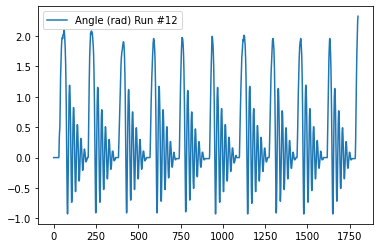

In [4]:
raw.iloc[0:1800].plot(y='Angle (rad) Run #12')

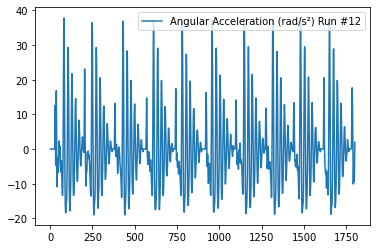

In [5]:
raw.iloc[0:1800].plot(y='Angular Acceleration (rad/s²) Run #12')

In [6]:
exp1 = raw.iloc[0:1800].rename(columns={"Time (s) Run #12": "Time", "Angle (rad) Run #12": "Theta", "Angular Velocity (rad/s) Run #12": "Omega", "Angular Acceleration (rad/s²) Run #12": "OmegaDot"}).filter(items=["Time", "Theta", "Omega", "OmegaDot"])
exp1["Run"] = 0
exp1["FirstOscillation"] = False
run = 0
inRun = False
runStarting = False
runEnding = False
firstOscillation = False
for row in exp1.itertuples():
  wasRunStarting = runStarting
  wasInRun = inRun
  wasRunEnding = runEnding
  
  runStarting = (not inRun) and (runStarting or row.Theta > 1.7)
  inRun = (inRun and not runEnding) or (runStarting and row.Theta < 1.6)
  firstOscillation = firstOscillation and row.Omega < 0.0
  runEnding = inRun and abs(row.Theta) < 0.02 and abs(row.Omega) < 0.01
  if runStarting and not wasRunStarting:
    print (f"Run starting: {row}")
  if inRun and not wasInRun:
    run += 1
    firstOscillation = True
    print (f"Running: {row}")
  if inRun:
    exp1.at[row.Index, "Run"] = run
    exp1.at[row.Index, "FirstOscillation"] = firstOscillation
  if runEnding and not wasRunEnding:
    print (f"Run ending: {row}")
  if not runStarting and not inRun and not runEnding and (wasRunStarting or wasInRun or wasRunEnding):
    print (f"None of the above: {row}")

Run starting: Pandas(Index=45, Time=2.25, Theta=1.71, Omega=1.745, OmegaDot=-3.297, Run=0, FirstOscillation=False)
Running: Pandas(Index=71, Time=3.55, Theta=1.518, Omega=-2.734, OmegaDot=-11.248, Run=0, FirstOscillation=False)
Run ending: Pandas(Index=201, Time=10.05, Theta=0.0, Omega=0.0, OmegaDot=0.776, Run=0, FirstOscillation=False)
None of the above: Pandas(Index=202, Time=10.1, Theta=0.0, Omega=0.0, OmegaDot=6.593, Run=0, FirstOscillation=False)
Run starting: Pandas(Index=214, Time=10.7, Theta=1.745, Omega=1.92, OmegaDot=-7.369, Run=0, FirstOscillation=False)
Running: Pandas(Index=238, Time=11.9, Theta=1.466, Omega=-2.851, OmegaDot=-11.248, Run=0, FirstOscillation=False)
Run ending: Pandas(Index=368, Time=18.4, Theta=0.0, Omega=0.0, OmegaDot=-0.582, Run=0, FirstOscillation=False)
None of the above: Pandas(Index=369, Time=18.45, Theta=0.0, Omega=0.0, OmegaDot=-0.194, Run=0, FirstOscillation=False)
Run starting: Pandas(Index=402, Time=20.1, Theta=1.71, Omega=0.524, OmegaDot=-2.521,

In [7]:
exp1[exp1.Run == 1]

,Time,Theta,Omega,OmegaDot,Run,FirstOscillation
71,3.55,1.518,-2.734,-11.248,1,True
72,3.60,1.361,-3.374,-12.605,1,True
73,3.65,1.187,-4.014,-13.381,1,True
74,3.70,0.960,-4.712,-13.187,1,True
75,3.75,0.716,-5.411,-11.248,1,True
...,...,...,...,...,...,...
197,9.85,-0.017,0.175,-0.194,1,False
198,9.90,-0.017,0.175,-0.582,1,False
199,9.95,0.000,0.116,-0.970,1,False
200,10.00,0.000,0.058,-0.970,1,False


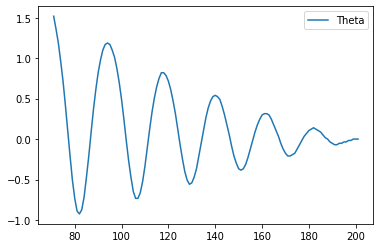

In [8]:
exp1[exp1.Run == 1].plot(y="Theta")

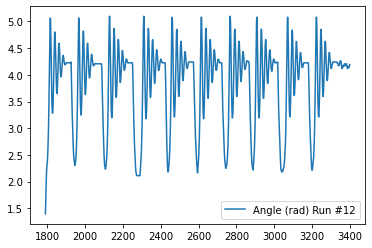

In [9]:
raw.iloc[1790:3400].plot(y='Angle (rad) Run #12')

In [10]:
exp2 = raw.iloc[1790:3400].rename(columns={"Time (s) Run #12": "Time", "Angle (rad) Run #12": "Theta", "Angular Velocity (rad/s) Run #12": "Omega", "Angular Acceleration (rad/s²) Run #12": "OmegaDot"}).filter(items=["Time", "Theta", "Omega", "OmegaDot"])
exp2["Run"] = 0
exp2["FirstOscillation"] = False
run = 0
inRun = False
runStarting = False
runEnding = False
firstOscillation = False
for row in exp2.itertuples():
  wasRunStarting = runStarting
  wasInRun = inRun
  wasRunEnding = runEnding
  
  runStarting = (not inRun) and (runStarting or row.Theta < 2.4)
  inRun = (inRun and not runEnding) or (runStarting and row.Theta > 2.5)
  firstOscillation = firstOscillation and row.Omega > 0.0
  runEnding = inRun and abs(row.Theta - 4.224) < 0.02 and abs(row.Omega) < 0.01
  if runStarting and not wasRunStarting:
    print (f"Run starting: {row}")
  if inRun and not wasInRun:
    run += 1
    firstOscillation = True
    print (f"Running: {row}")
  if inRun:
    exp2.at[row.Index, "Run"] = run
    exp2.at[row.Index, "FirstOscillation"] = firstOscillation
  if runEnding and not wasRunEnding:
    print (f"Run ending: {row}")
  if not runStarting and not inRun and not runEnding and (wasRunStarting or wasInRun or wasRunEnding):
    print (f"None of the above: {row}")

Run starting: Pandas(Index=1790, Time=89.5, Theta=1.396, Omega=3.782, OmegaDot=-10.084, Run=0, FirstOscillation=False)
Running: Pandas(Index=1803, Time=90.15, Theta=2.583, Omega=1.92, OmegaDot=6.593, Run=0, FirstOscillation=False)
Run ending: Pandas(Index=1901, Time=95.05, Theta=4.224, Omega=0.0, OmegaDot=-0.582, Run=0, FirstOscillation=False)
None of the above: Pandas(Index=1902, Time=95.1, Theta=4.224, Omega=0.0, OmegaDot=-0.194, Run=0, FirstOscillation=False)
Run starting: Pandas(Index=1942, Time=97.1, Theta=2.391, Omega=-0.756, OmegaDot=2.327, Run=0, FirstOscillation=False)
Running: Pandas(Index=1953, Time=97.65, Theta=2.566, Omega=1.513, OmegaDot=6.787, Run=0, FirstOscillation=False)
Run ending: Pandas(Index=2052, Time=102.6, Theta=4.206, Omega=0.0, OmegaDot=-0.582, Run=0, FirstOscillation=False)
None of the above: Pandas(Index=2053, Time=102.65, Theta=4.206, Omega=0.0, OmegaDot=-0.194, Run=0, FirstOscillation=False)
Run starting: Pandas(Index=2102, Time=105.1, Theta=2.339, Omega=

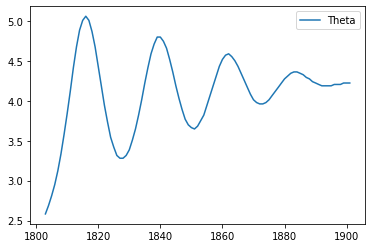

In [11]:
exp2[exp2.Run==1].plot(y="Theta")

In [12]:
exp1["Omega2"] = -exp1["Omega"] * exp1["Omega"]
exp2["Omega2"] = -exp2["Omega"] * exp2["Omega"]


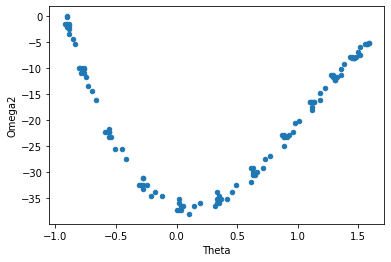

In [13]:
exp1[exp1.FirstOscillation].plot(kind="scatter", x="Theta", y="Omega2")

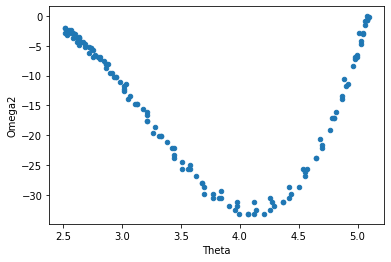

In [14]:
exp2[exp2.FirstOscillation].plot(kind="scatter", x="Theta", y="Omega2")

In [15]:
exp = pd.concat([exp1[exp1.FirstOscillation], exp2[exp2.FirstOscillation]])

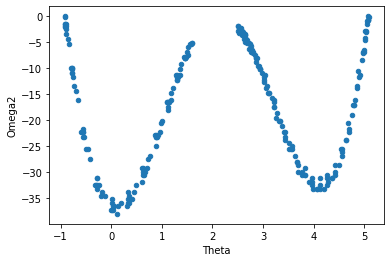

In [16]:
exp[exp.FirstOscillation].plot(kind="scatter", x="Theta", y="Omega2")

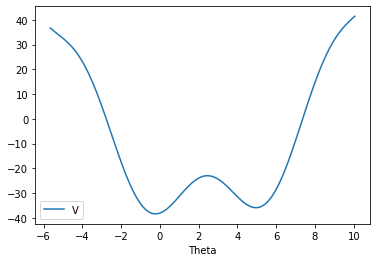

In [17]:
thetaError = 0.2
A = 30/25
gamma = 10
VOffset = -35
thetaOffset = 2.2
well = pd.DataFrame(np.linspace(-2.5 * np.pi + thetaOffset, 2.5 * np.pi + thetaOffset, 100), columns=["Theta"])
well["V"] = A * ((well["Theta"] - thetaOffset)**2 + gamma * np.cos(well["Theta"] - thetaOffset - thetaError)) + VOffset
well.plot(x="Theta", y="V")

In [18]:
from scipy.optimize import curve_fit

In [19]:
def V_theoretical(theta, thetaError, A, gamma, thetaOffset, zeroOffset, k):
  return A * ((theta - thetaOffset)**2 + abs(gamma) * np.cos(theta - thetaOffset - thetaError)) + zeroOffset

In [20]:
popt, pcov = curve_fit(V_theoretical, exp["Theta"], exp["Omega2"]) #, bounds=(0, [np.pi, 20.0, 10, np.pi, 50, 1]))
[popt, pcov]

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[array([  6.31991749,  14.48530387,   4.51572104,   2.08538478,
        -65.48904841,   1.        ]), array([[inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf]])]

In [21]:
thetaError = tuple(popt)[0]
A = tuple(popt)[1]
gamma = tuple(popt)[2]
thetaOffset = tuple(popt)[3]
zeroOffset = tuple(popt)[4]


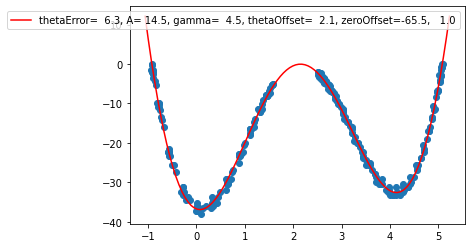

In [22]:
import matplotlib.pyplot as plt
xData = np.linspace(-np.pi + thetaOffset, np.pi + thetaOffset, 100);
plt.plot(xData, V_theoretical(xData, *popt), "r-", label="thetaError=%5.1f, A=%5.1f, gamma=%5.1f, thetaOffset=%5.1f, zeroOffset=%5.1f, %5.1f" % tuple(popt))
plt.scatter(exp["Theta"], exp["Omega2"])
plt.legend()

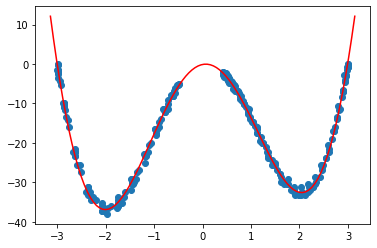

In [23]:
plt.plot(xData-thetaOffset, V_theoretical(xData, *popt), "r-")
plt.scatter(exp["Theta"]-thetaOffset, exp["Omega2"])

In [24]:
well = exp.filter(["Theta", "Omega2"])

In [25]:
well.Theta -= thetaOffset

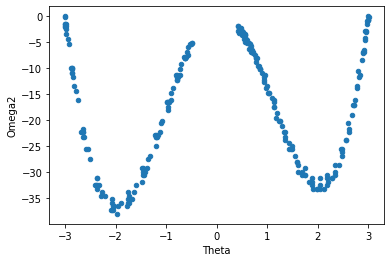

In [26]:
well.plot(kind="scatter", x="Theta", y="Omega2")

In [27]:
def V_(theta, thetaError, zeroOffset):
  return A * (theta**2 + gamma * np.cos(theta - thetaError)) + zeroOffset

In [28]:
popt, pcov = curve_fit(V_, well["Theta"], well["Omega2"])

In [29]:
popt

array([ 3.67321790e-02, -6.54890484e+01])

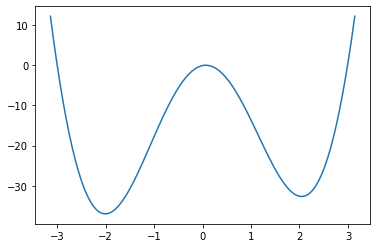

In [30]:
plt.plot(np.linspace(-np.pi, np.pi, 100), V_(np.linspace(-np.pi, np.pi, 100), 3.67321791e-02, -6.54890484e+01))

In [31]:
# thetaError = 0.021
# A = 14.48530387
# gamma = 4.51572104
# VOffset = -65.48904841
# theta=np.linspace(-1. * np.pi, 1. * np.pi, 100)
# V = A * (theta**2 + gamma * np.cos(theta - thetaError)) + VOffset

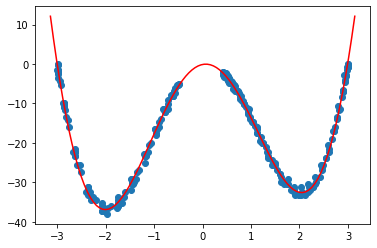

In [32]:
# plt.plot(theta, V, 'r-')
plt.plot(np.linspace(-np.pi, np.pi, 100), V_(np.linspace(-np.pi, np.pi, 100), 3.67321791e-02, -6.54890484e+01), 'r-')
plt.scatter(exp["Theta"]-thetaOffset, exp["Omega2"])

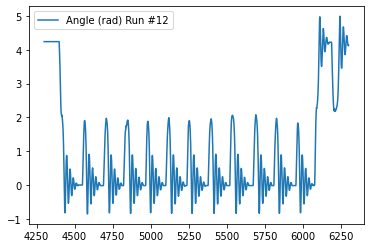

In [33]:
raw.iloc[4300:6300].plot(y='Angle (rad) Run #12')

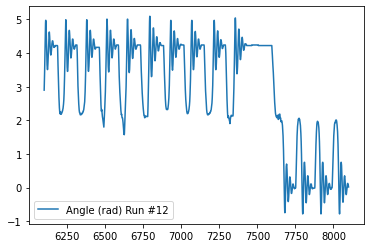

In [34]:
raw.iloc[6100:8100].plot(y='Angle (rad) Run #12')

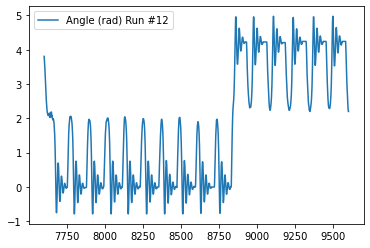

In [35]:
raw.iloc[7600:9600].plot(y='Angle (rad) Run #12')

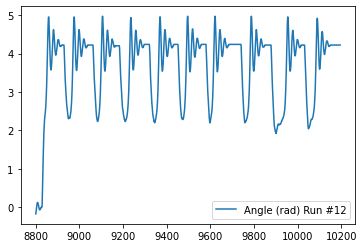

In [36]:
raw.iloc[8800:11500].plot(y='Angle (rad) Run #12')

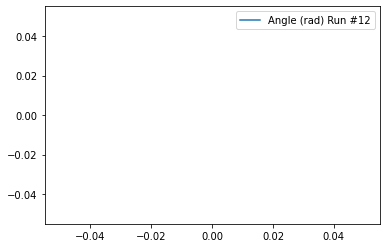

In [37]:
raw.iloc[11500:14500].plot(y='Angle (rad) Run #12')